In [3]:
import random

SIMULATIONS = 1000
STARTING_BALANCE = 1000
MAX_ROUNDS = 1000

a_wins = 0
b_wins = 0
timeouts = 0
rounds_list = []

for _ in range(SIMULATIONS):
    A = STARTING_BALANCE
    B = STARTING_BALANCE
    rounds = 0

    while A > 0 and B > 0 and rounds < MAX_ROUNDS:
        rounds += 1
        richest = max(A, B)

        bet = A * 0.05 if A <= 500 else richest * 0.20
        bet = min(bet, A, B)

        flip = random.random()
        if flip < 0.5:
            A += bet
            B -= bet
        else:
            A -= bet
            B += bet

    rounds_list.append(rounds)

    if A <= 0:
        b_wins += 1
    elif B <= 0:
        a_wins += 1
    else:
        timeouts += 1

print("=== Monte Carlo Simulation ===")
print(f"Simulations run     : {SIMULATIONS}")
print(f"Person A wins       : {a_wins}")
print(f"Person B wins       : {b_wins}")
print(f"Timed out (draws)   : {timeouts}")
print(f"Average rounds/game : {sum(rounds_list)/len(rounds_list):.2f}")
print(f"Max rounds in a game: {max(rounds_list)}")
print(f"Min rounds in a game: {min(rounds_list)}")


=== Monte Carlo Simulation ===
Simulations run     : 1000
Person A wins       : 456
Person B wins       : 0
Timed out (draws)   : 544
Average rounds/game : 566.33
Max rounds in a game: 1000
Min rounds in a game: 4


In [9]:
import random

# Settings
SIMULATIONS = 1000
STARTING_BALANCE = 1000
MAX_ROUNDS = 10_000

a_wins = 0
b_wins = 0
timeouts = 0
rounds_list = []

for _ in range(SIMULATIONS):
    A = STARTING_BALANCE
    B = STARTING_BALANCE
    rounds = 0

    while A > 0 and B > 0 and rounds < MAX_ROUNDS:
        rounds += 1

        richest = max(A, B)

        # A's adaptive strategy
        if A <= 500:
            bet = A * 0.05  # defensive
        else:
            bet = richest * 0.20  # aggressive if strong

        # Prevent stalling from micro-bets
        bet = max(0.01, bet)
        bet = min(bet, A, B)

        # Coin flip: 0 = HEADS (A wins), 1 = TAILS (B wins)
        if random.random() < 0.5:
            A += bet
            B -= bet
        else:
            A -= bet
            B += bet

    rounds_list.append(rounds)

    if A <= 0:
        b_wins += 1
    elif B <= 0:
        a_wins += 1
    else:
        timeouts += 1  # hit round cap

# 🧾 Final report
print("=== Monte Carlo Simulation ===")
print(f"Simulations run     : {SIMULATIONS}")
print(f"Person A wins       : {a_wins}")
print(f"Person B wins       : {b_wins}")
print(f"Timed out (draws)   : {timeouts}")
print(f"Average rounds/game : {sum(rounds_list)/len(rounds_list):.2f}")
print(f"Max rounds in a game: {max(rounds_list)}")
print(f"Min rounds in a game: {min(rounds_list)}")


=== Monte Carlo Simulation ===
Simulations run     : 1000
Person A wins       : 526
Person B wins       : 427
Timed out (draws)   : 47
Average rounds/game : 2870.66
Max rounds in a game: 10000
Min rounds in a game: 4


In [12]:
import math
import random

A = 1000
B = 1000
i = 100
y_preds = [1000]
x_preds = [1000]

while i > 0:
    i -= 1
    if A <= 0 or B <= 0:
        break
    if A < 300:
        betAmount = A * 0.05
    else:
        betAmount = max(A, B) * 0.2
    coin_flip = random.randint(0, 1)
    if coin_flip == 1:
        B += betAmount
        A -= betAmount
    else:
        A += betAmount
        B -= betAmount
    y_preds.append(B)
    x_preds.append(A)

print("A: ", x_preds, "B: ", y_preds)


A:  [1000, 800.0, 560.0, 272.0, 285.6, 271.32000000000005, 284.8860000000001, 270.64170000000007, 257.1096150000001, 269.9650957500001, 283.4633505375001, 297.6365180643751, 282.7546921611563, 268.6169575530985, 282.0478054307534, 296.15019570229106, 281.3426859171765, 267.2755516213177, 253.9117740402518, 266.6073627422644, 279.9377308793776, 265.94084433540877, 279.2378865521792, 265.27599222457025, 252.01219261334174, 264.61280224400883, 251.3821621318084, 238.81305402521798, 250.75370672647887, 263.2913920628028, 250.12682245966266, 262.6331635826458, 249.5015054035135, 237.02643013333784, 248.87775164000473, 236.4338640580045, 224.61217085510427, 235.8427793978595, 247.63491836775245, 260.0166642861401, 247.0158310718331, 259.3666226254248, 246.39829149415354, 258.7182060688612, 271.65411637230426, 285.2368221909195, 270.9749810813735, 257.4262320273049, 244.55492042593963, 232.32717440464265, 243.9435331248748, 256.1407097811185, 268.94774527017444, 282.3951325336832, 296.5148891

In [14]:
import numpy as np

time = np.arange(1, 1962)
print("Time: ", time)

Time:  [   1    2    3 ... 1959 1960 1961]


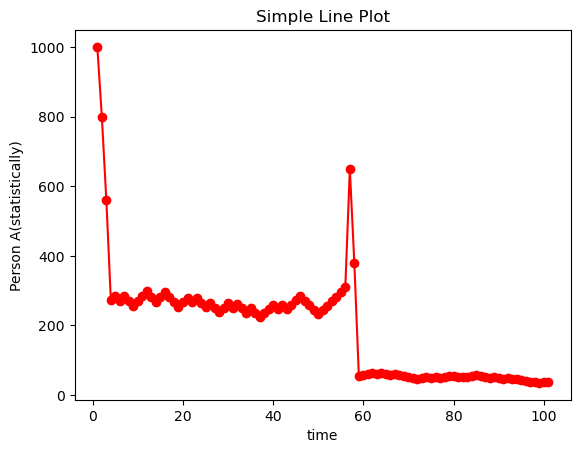

In [17]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots()
ax.plot(
    time[:len(x_preds)],
    x_preds,
    marker='o',
    color='red',
    linestyle='-',
)
ax.set_title("Simple Line Plot")
ax.set_xlabel("time")
ax.set_ylabel("Person A(statistically)")
plt.savefig("simple-line-plot.png")
plt.show()

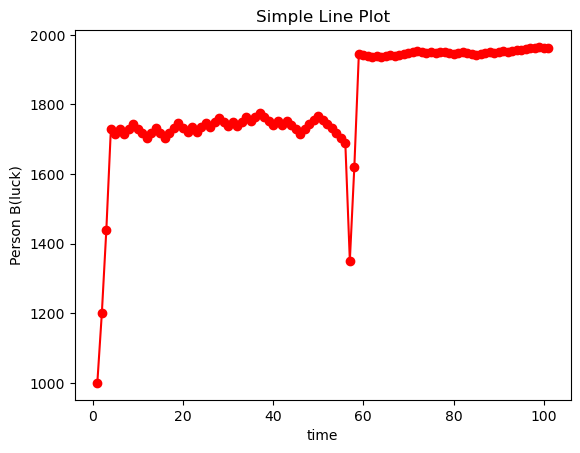

In [19]:
fig, ax = plt.subplots()
ax.plot(
    time[:len(y_preds)],
    y_preds,
    marker='o',
    color='red',
    linestyle='-',
)
ax.set_title("Simple Line Plot")
ax.set_xlabel("time")
ax.set_ylabel("Person B(luck)")
plt.savefig("simple-line-plot.png")
plt.show()

In [29]:
import math
import random

A = 1000
B = 1000
i = 100
b_preds = [1000]
a_preds = [1000]

while i > 0:
    i -= 1
    if A <= 0 or B <= 0:
        break

    if A < 300:
        betAmount = A * 0.05
    else:
        betAmount = max(A, B) * 0.2

    # Ensure betAmount is valid (at least 0.01 and not more than either player's money)
    betAmount = max(0.01, betAmount)
    betAmount = min(betAmount, A, B)

    coin_flip = random.randint(0, 1)
    if coin_flip == 1:
        B += betAmount
        A -= betAmount
    else:
        A += betAmount
        B -= betAmount

    b_preds.append(B)
    a_preds.append(A)

print("A: ", a_preds)
print("B: ", b_preds)


A:  [1000, 800.0, 1040.0, 1248.0, 998.4, 798.0799999999999, 1038.464, 1246.1568, 1495.38816, 1794.465792, 1588.931584, 1271.1452672, 1525.37432064, 1830.449184768, 2000.0]
B:  [1000, 1200.0, 960.0, 752.0, 1001.6, 1201.92, 961.5360000000001, 753.8432, 504.61184000000003, 205.53420800000004, 411.06841600000007, 728.8547328000001, 474.62567936000005, 169.55081523200005, 0.0]


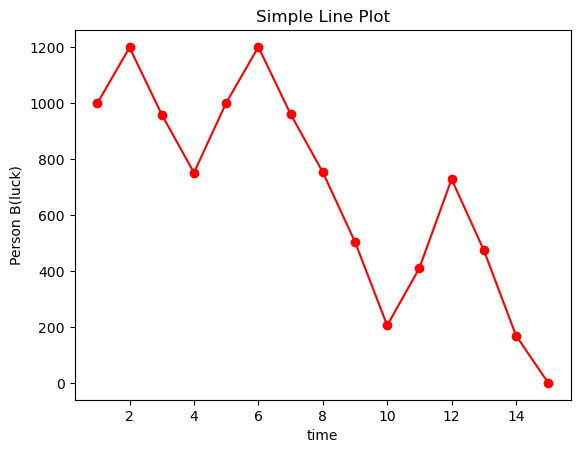

In [30]:
fig, ax = plt.subplots()
ax.plot(
    time[:len(b_preds)],
    b_preds,
    marker='o',
    color='red',
    linestyle='-',
)
ax.set_title("Simple Line Plot")
ax.set_xlabel("time")
ax.set_ylabel("Person B(luck)")
plt.savefig("simple-line-plot.png")
plt.show()

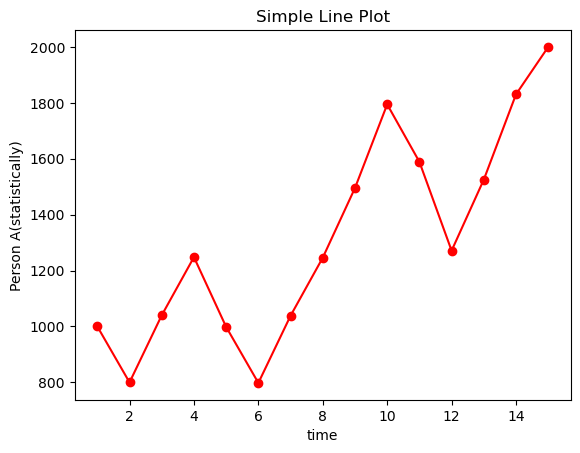

In [31]:
fig, ax = plt.subplots()
ax.plot(
    time[:len(a_preds)],
    a_preds,
    marker='o',
    color='red',
    linestyle='-',
)
ax.set_title("Simple Line Plot")
ax.set_xlabel("time")
ax.set_ylabel("Person A(statistically)")
plt.savefig("simple-line-plot.png")
plt.show()